In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

from scipy.spatial.transform import Rotation as R

# Problem 1

The set of all closed intervals in the real line with non-zero length: $\mathcal{B} = \{[a, b] : a < b\}$ is not a basis for a topology on $\mathbb{R}$, because the following counter-example does not meet the 2nd rule of a basis:

Lets suppose that we have two closed sets in the real line: $[5,10]$ and $[10,15]$. 

The first rule of a basis can be meet since for both of these sets (x) that belong to $\mathbb{R}$ (X), there exists a $B \in \mathcal{B}$ that contains the set. In the aforementioned example, that would be:

$B_1 = [5,10]$

$B_2 = [10,15]$

The second rule of a basis states that if $B_1 B_2 \in \mathcal{B}$ and the set (x) belongs to $B_1 \cap B_2$, then there exists a $B_3 \subseteq B_1 \cap B_2$ such that the set (x) belongs to $B_3$. Consequently, in the concrete example mentioned before, we would have the following:

$B_1 \cap B_2 = [10,10]$

The closed set $[10,10]$ is violating the property of the basis that says that the interval has non-zero length because $a = b$, instead of being $a < b$. Thus, we can conclude that the given basis is not a basis for a topology in $\mathbb{R}$. $\blacksquare$

# Problem 2

To show that the metric restricted to A, $d|_{AxA}$, gives the same topology as the subspace topology on $A$, first we need to proof that $\mathcal{B}_A = \{B \cap A | B \in \mathcal{B}\}$ is the basis for the subspace A, as asked in excercise 2 in section 1 of the notes.

We know that $X$ is a topological space with basis $\mathcal{B}$, which can be defined as the collection of open balls by using the metric function $d: X \times X$. Now, given a set $U$ open in $X$ and given $a \in U \cap A$, we can choose an element $B$ of $\mathcal{B}$ such that $a \in B \subset U$. Then $a \in B \cap A \subset U \cap A$. 

Now we need to proof that $\mathcal{B}_A$ is a basis, so lets go over the 2 rules and see if they are meet:

1) Since $A$ is a topology, thus an open set, for each $a \in A$ there exists a $B_A \in \mathcal{B}_A$ containing $a$.

2) Let $a$ belong to $B_{A1} \cap B_{A2}$, where $B_{A1}$ and $B_{A2}$ are elements of $\mathcal{B}_A$. Since $B_{A1}$ and $B_{A2}$ are open, so is $B_{A1} \cap B_{A2}$. Therefore, there exists an element $B_{A3}$ in $\mathcal{B}_A$ such that $x \in B_{A3} \subset B_{A1} \cap B_{A2}$

Since the 2 rules of a basis are satisfied we can say that $\mathcal{B}_A$ is a valid basis for $A$.

On the other hand, we know by definition, that we can define a basis by using the metric space. Therefore, if we use the metric space restricted to A, $d|_{AxA}$ to define a basis for $A$, it would give us the same topology as the subspace topology on A. In this case, $\mathcal{B}_A$ would be the collection of open balls defined by $B(a,r_A) = \{y \in A : d(a,y) < r_A \}$. 

<!-- In conclusion, we showed that (1) we can define a basis for the subspace topology on $A$ composed by the sets $\{B \cap A | B \in \mathcal{B}\}$; and (2) we can also define a basis for $A$ by using the restricted metric space $d|_{AxA}$ composed by the sets of open balls defined by $B(a,r_A) = \{y \in A : d(a,y) < r_A \}$. Therefore, we can ensure that both basis render the same subspace topology $A$. $\blacksquare$ -->

![alt text](p2.png "Graph")

We can conclude that both basis generate the same topology of the subspace $A$, because if we define an open set $U \subset A$ and we pick a random point $a \in U$, there exists a basis element $B$ in either of the above defined $\mathcal{B}_A$ such that $a \in B \subset U$. $\blacksquare$

Note: information to solve this problem were extracted from "Topology, 2nd edition - James R. Munkres" and "Terse Notes on Riemannian Geometry, Juanuary 26, 2010 - Tom Fletcher"

# Problem 3

In [2]:
# Equation extracted from https://en.wikipedia.org/wiki/Stereographic_projection

def get_stereographic_projection(x,y,z):
    x_2d = x / (1 - z)
    y_2d = y / (1 - z)
    return x_2d, y_2d

In [3]:
# Conversion extracted from https://stackoverflow.com/questions/1185408/converting-from-longitude-latitude-to-cartesian-coordinates

def get_cartesian_coordinates(latitude, longitude):
    """ 
    latitude: angle in degrees
    longitude: angle in degrees
    """
    R = 1
    latitude = latitude * math.pi / 180
    longitude = longitude * math.pi / 180

    x = R * math.cos(latitude) * math.cos(longitude)
    y = R * math.cos(latitude) * math.sin(longitude)
    z = R * math.sin(latitude)

    return x, y, z

## A

In [4]:
def get_longitudinal_line(p_longitude):
    """
    p_longitude: angle between 0 - 179 in degrees.
    """
    xs_2d = []
    ys_2d = []
    for latitude in np.arange(-90, 90, 1):
        for longitude in [p_longitude - 180, p_longitude]:
            x, y, z = get_cartesian_coordinates(latitude, longitude)
            x_2d, y_2d = get_stereographic_projection(x, y, z)
            xs_2d.append(x_2d)
            ys_2d.append(y_2d)
    return xs_2d, ys_2d

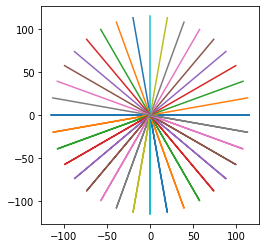

In [5]:
fig, ax = plt.subplots()
ax.set_aspect(1)

for longitude in range(0, 180, 10):
    X, Y = get_longitudinal_line(longitude)
    ax.plot(X, Y)

The stereographic projections for longitudinal lines in the plane are straigth lines going through the origin (0,0).

## B

In [6]:
def get_latitude_line(latitude):
    """
    latitude: angle between 0 - 89 in degrees.
    """
    xs_2d = []
    ys_2d = []
    for longitude in np.arange(-180, 180, 1):
        x, y, z = get_cartesian_coordinates(latitude, longitude)
        x_2d, y_2d = get_stereographic_projection(x, y, z)
        xs_2d.append(x_2d)
        ys_2d.append(y_2d)
    return xs_2d, ys_2d

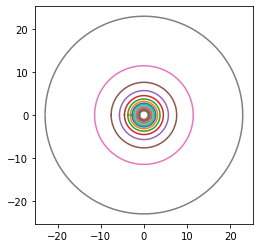

In [7]:
fig, ax = plt.subplots()
ax.set_aspect(1)

for latitude in range(0, 90, 5):
    X, Y = get_latitude_line(latitude)
    ax.plot(X, Y)

The stereographic projections of latitudes in the plane are concentric circles around the origin (0,0). As the latitude is closer to the north pole, the bigger the circle in the plane is.

## C

In [8]:
def get_equator():
    """
    Return a circle fixed to z = 0
    """
    X, Y, Z = [], [], []
    for longitude in np.arange(-180, 180, 1):
        x, y, z = get_cartesian_coordinates(0, longitude)
        X.append(x)
        Y.append(y)
        Z.append(z)
    return np.array([X, Y, Z])

In [9]:
def get_rotated_equator(x_slope=0, y_slope=0):
    r = R.from_euler('xy', [x_slope, y_slope], degrees=True)
    equator = get_equator()
    equator = np.transpose(equator)
    r_equator = r.apply(equator)

    xs_2d, ys_2d = [], []
    for x, y, z in r_equator:
        x_2d, y_2d = get_stereographic_projection(x, y, z)
        xs_2d.append(x_2d)
        ys_2d.append(y_2d)

    return xs_2d, ys_2d

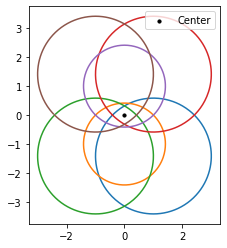

In [10]:
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.scatter(0,0, s=10, color='black', label='Center')
for x_slope in [-45, 45]:
    for y_slope in [-45, 0, 45]:
        xs_2d, ys_2d = get_rotated_equator(x_slope, y_slope)
        ax.plot(xs_2d, ys_2d)
ax.legend()

The stereographic projections of great circles with different x-axis and y-axis alignments in the plane are shifted circles around the origin (0,0). If the great circle has an x-axis slope, then the circle in the plane will be shifted to left or right of the origin. Alternatively, if the great circle has an y-axis slope, then the circle in the plane will be shifted up or down of the origin.

# Problem 4

## A

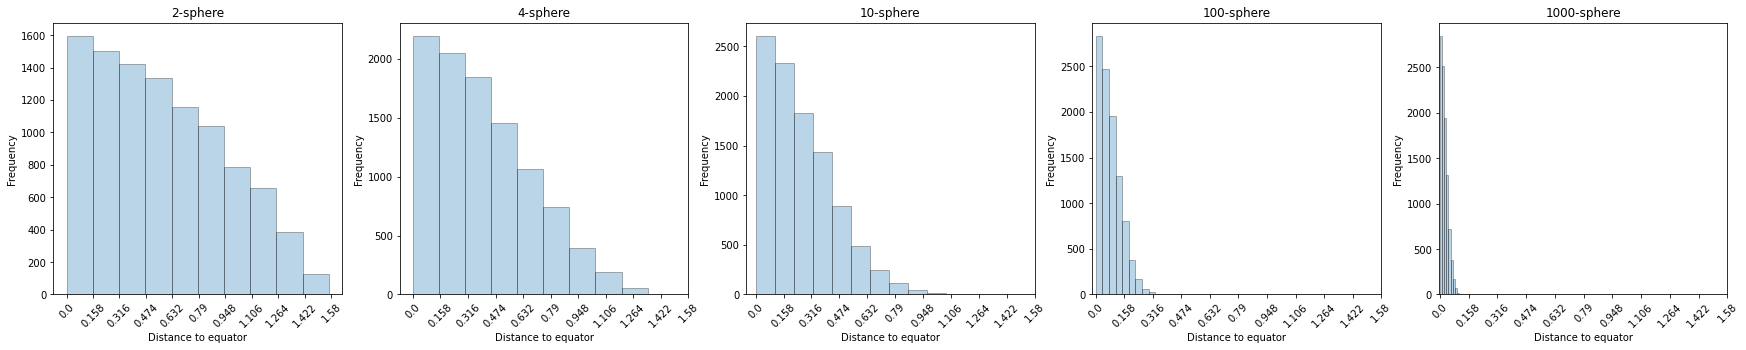

In [11]:
fig, axs = plt.subplots(1,5)
fig.set_figheight(5)
fig.set_figwidth(30)
plt.subplots_adjust(wspace=0.2, hspace=None)

for n, d in enumerate([2,4,10,100,1000]):
    X = []
    for i in range(10000):
        point = np.random.normal(0, 1, d+1)
        unit_point = point / math.sqrt((point ** 2).sum())
        equator = unit_point
        equator[0] = 0
        equator_point = equator / math.sqrt((equator ** 2).sum())
        dot_product = np.dot(unit_point, equator_point)
        distance = np.arccos(dot_product)
        X.append(distance)
    axs[n].hist(X, label=d, edgecolor="black", alpha=0.3)
    axs[n].set_xlabel("Distance to equator")
    axs[n].set_xticks(np.arange(0,1.581,0.158))
    axs[n].set_xticklabels(np.arange(0,1.581,0.158), rotation=45)
    axs[n].set_ylabel("Frequency")
    axs[n].set_title(f"{d}-sphere", fontsize=12)

### **1) What do you notice as d increases?** 

As d increases, the distances to the d-dimensional equator (hyper-plane) become smaller and smaller.

### **2) What does this say about uniform random points on the sphere?**

Since the distance between uniform random points in the sphere and the d-dimensional equator becomes smaller as d increases, that means that sphere points are closer to an hyper-plane in the sphere in high-dimensional spaces.

### **3) Would this result be the same or different if you used a different great circle (possibly not axis-aligned)?**

The results would be similar if you use a different great circle. A great circle must go through the origin, similar to what the equator does, but with a different axis-alignment. However, all great circles have the same area whitin the sphere, thus if you sample uniform random points on the sphere, the distances between these points and the d-dimensional great circle will be similar to the distances between the points and the d-dimensional equator.

## B

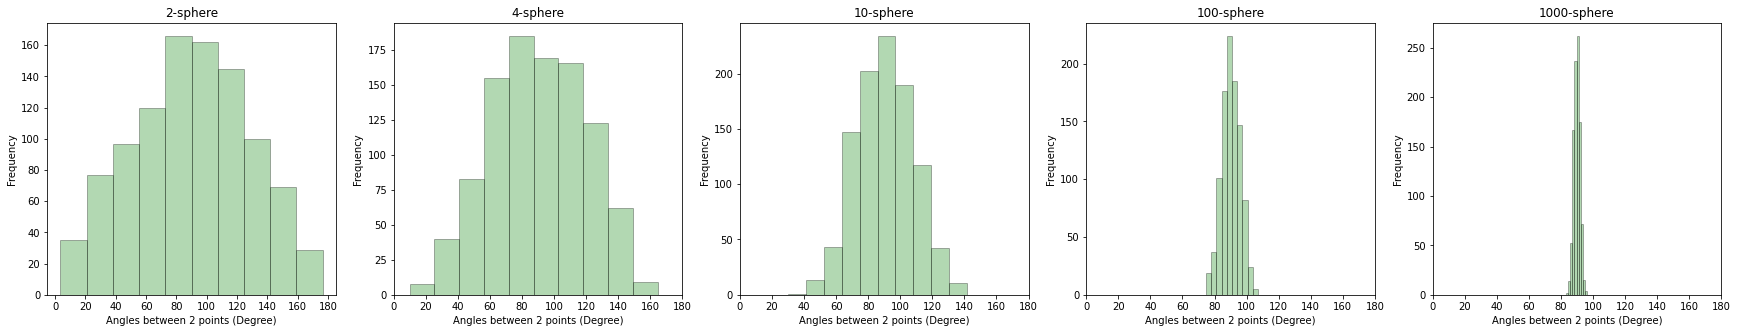

In [12]:
fig, axs = plt.subplots(1,5)
fig.set_figheight(5)
fig.set_figwidth(30)
plt.subplots_adjust(wspace=0.2, hspace=None)

for n, d in enumerate([2,4,10,100,1000]):
    X = []
    for i in range(1000):
        point1 = np.random.normal(0, 1, d+1)
        unit_point1 = point1 / math.sqrt((point1 ** 2).sum())
        point2 = np.random.normal(0, 1, d+1)
        unit_point2 = point2 / math.sqrt((point2 ** 2).sum())
        dot_product = np.dot(unit_point1, unit_point2)
        angle = np.arccos(dot_product) * 180 / np.pi
        X.append(angle)
    axs[n].hist(X, label=d, color="green", edgecolor="black", alpha=0.3)
    axs[n].set_xlabel("Angles between 2 points (Degree)")
    axs[n].set_xticks(np.arange(0,181,20))
    axs[n].set_ylabel("Frequency")
    axs[n].set_title(f"{d}-sphere")

### **1) What do you notice as d increases and what does it say about the geometry of uniformly random points?**

As d increases, the angles between two uniform random points tend to concentrate around 90 degrees; i.e. the angles have a normal distribution with a mean of 90 degrees but with smaller standard deviation. Thus, meaning that in high-dimensional spaces where d tend to infinity, random points will tend to be orthogonal to each other.